In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('../input/teacher-placement/placement_teacher.xlsx')
df

,teacher_id,total_call_before_pt,total_call_after_pt,call_before_pt_yes,call_after_pt_yes,not_held,held_at_1,held_at_2,held_at_3,held_at_4,total_held,buy_premium_y,buy_premium_n,total_student,rate_not_held,rate_bp_y,rate_bp_n,fraud_possibility
0,9,128,152,55,80,18,61,30,7,2,100,12,78,90,0.200000,0.133333,0.866667,Medium
1,16,9,19,5,9,2,8,2,0,0,10,1,10,11,0.181818,0.090909,0.909091,Low
2,36,3,2,2,2,0,2,0,0,0,2,0,2,2,0.000000,0.000000,1.000000,Low
3,37,41,29,24,13,15,10,3,0,2,15,2,24,26,0.576923,0.076923,0.923077,Low
4,39,134,162,82,65,44,54,24,13,5,96,13,89,102,0.431373,0.127451,0.872549,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1664,6,5,5,5,0,5,0,0,0,5,0,5,5,0.000000,0.000000,1.000000,Low
326,1670,6,4,4,4,2,2,0,0,0,2,0,4,4,0.500000,0.000000,1.000000,Low
327,1682,15,19,10,9,2,8,2,0,0,10,2,8,10,0.200000,0.200000,0.800000,Low
328,1691,5,7,4,5,1,3,1,0,0,4,0,5,5,0.200000,0.000000,1.000000,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   teacher_id            330 non-null    int64  
 1   total_call_before_pt  330 non-null    int64  
 2   total_call_after_pt   330 non-null    int64  
 3   call_before_pt_yes    330 non-null    int64  
 4   call_after_pt_yes     330 non-null    int64  
 5   not_held              330 non-null    int64  
 6   held_at_1             330 non-null    int64  
 7   held_at_2             330 non-null    int64  
 8   held_at_3             330 non-null    int64  
 9   held_at_4             330 non-null    int64  
 10  total_held            330 non-null    int64  
 11  buy_premium_y         330 non-null    int64  
 12  buy_premium_n         330 non-null    int64  
 13  total_student         330 non-null    int64  
 14  rate_not_held         330 non-null    float64
 15  rate_bp_y             3

## Correlation between columns

In [4]:
df_corr = df.copy()

fraud_prob = {'Low': 0, 'Medium': 1, 'High': 2}
df_corr['fraud_possibility'] = df_corr['fraud_possibility'].replace(fraud_prob)

df_corr

,teacher_id,total_call_before_pt,total_call_after_pt,call_before_pt_yes,call_after_pt_yes,not_held,held_at_1,held_at_2,held_at_3,held_at_4,total_held,buy_premium_y,buy_premium_n,total_student,rate_not_held,rate_bp_y,rate_bp_n,fraud_possibility
0,9,128,152,55,80,18,61,30,7,2,100,12,78,90,0.200000,0.133333,0.866667,1
1,16,9,19,5,9,2,8,2,0,0,10,1,10,11,0.181818,0.090909,0.909091,0
2,36,3,2,2,2,0,2,0,0,0,2,0,2,2,0.000000,0.000000,1.000000,0
3,37,41,29,24,13,15,10,3,0,2,15,2,24,26,0.576923,0.076923,0.923077,0
4,39,134,162,82,65,44,54,24,13,5,96,13,89,102,0.431373,0.127451,0.872549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1664,6,5,5,5,0,5,0,0,0,5,0,5,5,0.000000,0.000000,1.000000,0
326,1670,6,4,4,4,2,2,0,0,0,2,0,4,4,0.500000,0.000000,1.000000,0
327,1682,15,19,10,9,2,8,2,0,0,10,2,8,10,0.200000,0.200000,0.800000,0
328,1691,5,7,4,5,1,3,1,0,0,4,0,5,5,0.200000,0.000000,1.000000,0


In [5]:
df_corr.corr()

,teacher_id,total_call_before_pt,total_call_after_pt,call_before_pt_yes,call_after_pt_yes,not_held,held_at_1,held_at_2,held_at_3,held_at_4,total_held,buy_premium_y,buy_premium_n,total_student,rate_not_held,rate_bp_y,rate_bp_n,fraud_possibility
teacher_id,1.000000,-0.118935,-0.169332,-0.095289,-0.124720,-0.072269,-0.133051,-0.203857,-0.241166,-0.247250,-0.166692,-0.158516,-0.095461,-0.104043,-0.038407,-0.047381,0.047381,-0.017290
total_call_before_pt,-0.118935,1.000000,0.967620,0.987832,0.968058,0.973489,0.967933,0.933459,0.830120,0.791392,0.963378,0.871078,0.984898,0.986302,0.129647,-0.094227,0.094227,0.560902
total_call_after_pt,-0.169332,0.967620,1.000000,0.962369,0.983921,0.935535,0.980759,0.974996,0.901314,0.852744,0.990213,0.913510,0.965101,0.973310,0.075851,-0.064216,0.064216,0.504880
call_before_pt_yes,-0.095289,0.987832,0.962369,1.000000,0.971773,0.990754,0.971083,0.918213,0.811907,0.777477,0.959965,0.871791,0.996160,0.996526,0.142561,-0.100689,0.100689,0.571794
call_after_pt_yes,-0.124720,0.968058,0.983921,0.971773,1.000000,0.946511,0.995875,0.958557,0.851077,0.803333,0.989969,0.906188,0.979273,0.985239,0.077591,-0.087732,0.087732,0.518615
not_held,-0.072269,0.973489,0.935535,0.990754,0.946511,1.000000,0.939400,0.881751,0.774298,0.745013,0.925929,0.846070,0.988168,0.986396,0.190051,-0.111549,0.111549,0.590638
held_at_1,-0.133051,0.967933,0.980759,0.971083,0.995875,0.939400,1.000000,0.959320,0.854112,0.806340,0.993332,0.904829,0.976419,0.982513,0.061217,-0.082861,0.082861,0.508775
held_at_2,-0.203857,0.933459,0.974996,0.918213,0.958557,0.881751,0.959320,1.000000,0.913455,0.847547,0.981836,0.912198,0.922258,0.934576,0.050107,-0.041856,0.041856,0.448346
held_at_3,-0.241166,0.830120,0.901314,0.811907,0.851077,0.774298,0.854112,0.913455,1.000000,0.866858,0.901207,0.888775,0.804998,0.826300,0.035934,0.007607,-0.007607,0.349408
held_at_4,-0.247250,0.791392,0.852744,0.777477,0.803333,0.745013,0.806340,0.847547,0.866858,1.000000,0.850357,0.864704,0.763716,0.786379,0.047435,0.021469,-0.021469,0.343444


<AxesSubplot:>

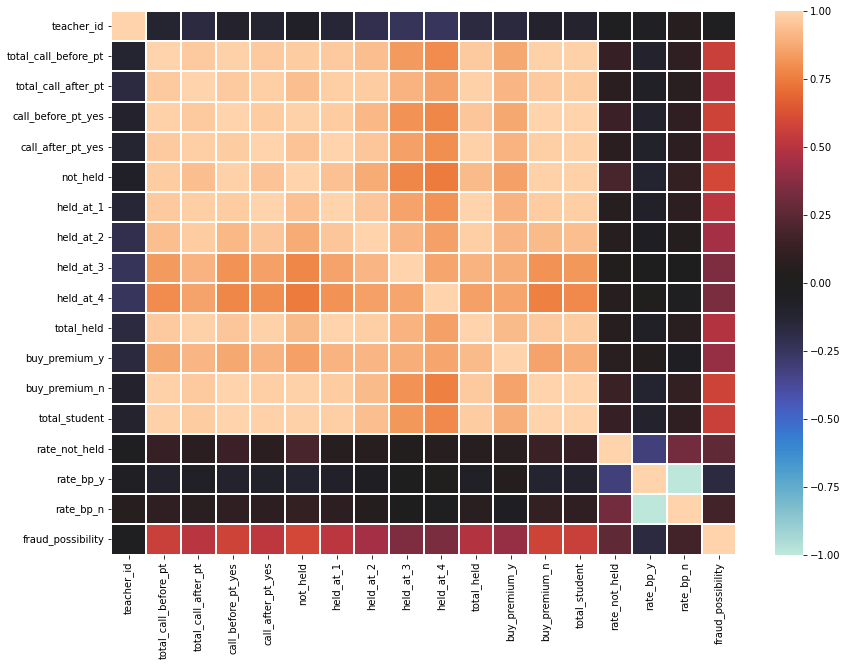

In [6]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_corr.corr(), linewidths=0.1, center=0)

# Making AI Model

In [7]:
# make a copy of df_corr and save it to a new dataframe
dataframe = df_corr.copy()

dataframe.head()

,teacher_id,total_call_before_pt,total_call_after_pt,call_before_pt_yes,call_after_pt_yes,not_held,held_at_1,held_at_2,held_at_3,held_at_4,total_held,buy_premium_y,buy_premium_n,total_student,rate_not_held,rate_bp_y,rate_bp_n,fraud_possibility
0,9,128,152,55,80,18,61,30,7,2,100,12,78,90,0.200000,0.133333,0.866667,1
1,16,9,19,5,9,2,8,2,0,0,10,1,10,11,0.181818,0.090909,0.909091,0
2,36,3,2,2,2,0,2,0,0,0,2,0,2,2,0.000000,0.000000,1.000000,0
3,37,41,29,24,13,15,10,3,0,2,15,2,24,26,0.576923,0.076923,0.923077,0
4,39,134,162,82,65,44,54,24,13,5,96,13,89,102,0.431373,0.127451,0.872549,1


In [8]:
train, val = train_test_split(dataframe, train_size=0.95)
train, test = train_test_split(train, train_size=0.95)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

297 train examples
17 validation examples
16 test examples


In [9]:
# transform dataframe to dataset
def df_to_dataset(dataframe, target, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    
    # Use Pandas dataframe's pop method to get the list of targets.
    labels = dataframe.pop(target)
    
    # Create a tf.data.Dataset from the dataframe and labels.
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    
    if shuffle:
        # Shuffle dataset.
        ds = ds.shuffle(buffer_size=len(dataframe))
        
    # Batch dataset with specified batch_size parameter.
    ds = ds.batch(batch_size)
    
    return ds

In [10]:
# numerical columns
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for the feature.
    normalizer = tf.keras.layers.Normalization(axis=None)

    # Prepare a Dataset that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

# encode categorical columns
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    # Create a layer that turns strings into integer indices.
    if dtype == 'string':
          index = tf.keras.layers.StringLookup(max_tokens=max_tokens)
    # Otherwise, create a layer that turns integer values into integer indices.
    else:
          index = tf.keras.layers.IntegerLookup(max_tokens=max_tokens)

    # Prepare a `tf.data.Dataset` that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

    # Encode the integer indices.
    encoder = tf.keras.layers.CategoryEncoding(num_tokens=index.vocabulary_size())

    # Apply multi-hot encoding to the indices. The lambda function captures the
    # layer, so you can use them, or include them in the Keras Functional model later.
    return lambda feature: encoder(index(feature))

In [11]:
batch_size = 32
train_ds = df_to_dataset(train, target='fraud_possibility', batch_size=batch_size)
val_ds = df_to_dataset(val, target='fraud_possibility', shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, target='fraud_possibility', shuffle=False, batch_size=batch_size)

2022-10-07 11:58:29.347493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 11:58:29.444714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 11:58:29.445581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 11:58:29.448340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
all_inputs = []
encoded_features = []

# numerical columns
numerical_col = ['total_call_before_pt',
                 'total_call_after_pt',
                 'call_before_pt_yes',
                 'call_after_pt_yes',
                 'not_held',
                 'held_at_1',
                 'held_at_2',
                 'held_at_3',
                 'held_at_4',
                 'total_held',
                 'buy_premium_y',
                 'buy_premium_n',
                 'total_student',
                 'rate_not_held',
                 'rate_bp_y',
                 'rate_bp_n'
                ]

for header in numerical_col:
    num_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(num_col)
    all_inputs.append(num_col)
    encoded_features.append(encoded_numeric_col)
    
# categorical column
teacher_col = tf.keras.Input(shape=(1,), name='teacher_id', dtype='int64')
encoding_layer = get_category_encoding_layer(name='teacher_id',
                                             dataset=train_ds,
                                             dtype='int64'
                                            )
encoded_teacher_col = encoding_layer(teacher_col)
all_inputs.append(teacher_col)
encoded_features.append(encoded_teacher_col)

2022-10-07 11:58:32.810090: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [13]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(128, activation="relu")(all_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
teacher_id (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
total_call_before_pt (InputLaye [(None, 1)]          0                                            
__________________________________________________________________________________________________
total_call_after_pt (InputLayer [(None, 1)]          0                                            
__________________________________________________________________________________________________
call_before_pt_yes (InputLayer) [(None, 1)]          0                                            
______________________________________________________________________________________________

In [14]:
model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 2s 39ms/step - loss: 1.0509 - accuracy: 0.6768 - val_loss: 0.9684 - val_accuracy: 0.7647
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.9017 - accuracy: 0.7239 - val_loss: 0.7645 - val_accuracy: 0.7647
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.7205 - val_loss: 0.5182 - val_accuracy: 0.7647
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4974 - accuracy: 0.7205 - val_loss: 0.4334 - val_accuracy: 0.7647
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4410 - accuracy: 0.7205 - val_loss: 0.4005 - val_accuracy: 0.7647
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4029 - accuracy: 0.7205 - val_loss: 0.3793 - val_accuracy: 0.7647
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 0.3751 - accuracy: 0.7205 - val_loss: 0.3637 - val_accuracy: 0.7647
Epoch 8/20
10/10 [============

In [15]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1/1 [==============================] - 0s 13ms/step - loss: 0.5511 - accuracy: 0.8125
Accuracy 0.8125


In [16]:
prediction = model.predict(test_ds)
prediction

array([[4.5613346e-01, 4.1514868e-01, 1.2871785e-01],
       [9.9984193e-01, 1.5780913e-04, 1.9340276e-07],
       [9.9999666e-01, 3.3295155e-06, 2.9866365e-10],
       [9.9999940e-01, 6.4459965e-07, 6.3176728e-11],
       [9.9984598e-01, 1.5386724e-04, 1.3998800e-07],
       [9.9995601e-01, 4.4027212e-05, 1.8714088e-08],
       [1.9420138e-01, 8.0526578e-01, 5.3288601e-04],
       [9.7086990e-01, 2.9101918e-02, 2.8277645e-05],
       [9.9999428e-01, 5.7152288e-06, 2.0268853e-09],
       [9.9947256e-01, 5.2623259e-04, 1.1495687e-06],
       [9.9999988e-01, 9.9610340e-08, 3.4543718e-12],
       [1.0000000e+00, 5.5467866e-11, 3.5835118e-17],
       [9.9999559e-01, 4.4003618e-06, 1.5652989e-09],
       [3.3389005e-01, 6.2365383e-01, 4.2456128e-02],
       [3.2824028e-01, 6.3704669e-01, 3.4713034e-02],
       [9.9985850e-01, 1.4138181e-04, 1.1421806e-07]], dtype=float32)

In [17]:
# compare the prediction with the test data
test_result = pd.DataFrame(columns=['fraud_possibility', 'predict_result'])
test_result['fraud_possibility'] = test['fraud_possibility']
result = []

for predict in prediction:
    value = predict.max()
    index = np.where(predict == value)
    result.append(index[0][0])

test_result['predict_result'] = result

test_result

,fraud_possibility,predict_result
194,2,0
262,0,0
13,0,0
247,0,0
97,0,0
41,0,0
4,1,1
89,0,0
70,0,0
86,0,0


## 2nd model by excluding teacher_id

In [18]:
# make a copy of df_corr and save it to a another new dataframe
dataframe2 = df_corr.copy()
dataframe2 = dataframe2.drop(columns=['teacher_id'])

dataframe2

,total_call_before_pt,total_call_after_pt,call_before_pt_yes,call_after_pt_yes,not_held,held_at_1,held_at_2,held_at_3,held_at_4,total_held,buy_premium_y,buy_premium_n,total_student,rate_not_held,rate_bp_y,rate_bp_n,fraud_possibility
0,128,152,55,80,18,61,30,7,2,100,12,78,90,0.200000,0.133333,0.866667,1
1,9,19,5,9,2,8,2,0,0,10,1,10,11,0.181818,0.090909,0.909091,0
2,3,2,2,2,0,2,0,0,0,2,0,2,2,0.000000,0.000000,1.000000,0
3,41,29,24,13,15,10,3,0,2,15,2,24,26,0.576923,0.076923,0.923077,0
4,134,162,82,65,44,54,24,13,5,96,13,89,102,0.431373,0.127451,0.872549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,6,5,5,5,0,5,0,0,0,5,0,5,5,0.000000,0.000000,1.000000,0
326,6,4,4,4,2,2,0,0,0,2,0,4,4,0.500000,0.000000,1.000000,0
327,15,19,10,9,2,8,2,0,0,10,2,8,10,0.200000,0.200000,0.800000,0
328,5,7,4,5,1,3,1,0,0,4,0,5,5,0.200000,0.000000,1.000000,0


In [19]:
train2, val2 = train_test_split(dataframe2, train_size=0.95)
train2, test2 = train_test_split(train2, train_size=0.95)
print(len(train2), 'train examples')
print(len(val2), 'validation examples')
print(len(test2), 'test examples')

297 train examples
17 validation examples
16 test examples


In [20]:
batch_size = 32
train2_ds = df_to_dataset(train2, target='fraud_possibility', batch_size=batch_size)
val2_ds = df_to_dataset(val2, target='fraud_possibility', shuffle=False, batch_size=batch_size)
test2_ds = df_to_dataset(test2, target='fraud_possibility', shuffle=False, batch_size=batch_size)

In [21]:
all_inputs2 = []
encoded_features2 = []

# numerical columns
numerical_col2 = ['total_call_before_pt',
                 'total_call_after_pt',
                 'call_before_pt_yes',
                 'call_after_pt_yes',
                 'not_held',
                 'held_at_1',
                 'held_at_2',
                 'held_at_3',
                 'held_at_4',
                 'total_held',
                 'buy_premium_y',
                 'buy_premium_n',
                 'total_student',
                 'rate_not_held',
                 'rate_bp_y',
                 'rate_bp_n'
                ]

for header in numerical_col2:
    num_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train2_ds)
    encoded_numeric_col = normalization_layer(num_col)
    all_inputs2.append(num_col)
    encoded_features2.append(encoded_numeric_col)

In [22]:
all_features2 = tf.keras.layers.concatenate(encoded_features2)
x = tf.keras.layers.Dense(128, activation="relu")(all_features2)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)

model2 = tf.keras.Model(all_inputs2, output)

model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"]
              )

# Use `rankdir='LR'` to make the graph horizontal.
# tf.keras.utils.plot_model(model2, show_shapes=True, rankdir="LR")

# model.summary()

In [23]:
model2.fit(train2_ds, epochs=20, validation_data=val2_ds)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 1s 30ms/step - loss: 1.0413 - accuracy: 0.7273 - val_loss: 0.9884 - val_accuracy: 0.7059
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.8896 - accuracy: 0.8721 - val_loss: 0.8486 - val_accuracy: 0.7059
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.8754 - val_loss: 0.6889 - val_accuracy: 0.7059
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.8721 - val_loss: 0.5889 - val_accuracy: 0.7059
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8754 - val_loss: 0.5433 - val_accuracy: 0.7059
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.3356 - accuracy: 0.8822 - val_loss: 0.4784 - val_accuracy: 0.7647
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8889 - val_loss: 0.4176 - val_accuracy: 0.7647
Epoch 8/20
10/10 [============

In [24]:
loss, accuracy = model2.evaluate(test2_ds)
print("Accuracy", accuracy)

1/1 [==============================] - 0s 13ms/step - loss: 0.0971 - accuracy: 1.0000
Accuracy 1.0


In [25]:
prediction2 = model2.predict(test2_ds)
prediction2

array([[5.74519560e-02, 8.68263423e-01, 7.42846429e-02],
       [6.12986922e-01, 3.76933455e-01, 1.00796437e-02],
       [9.99765575e-01, 2.34468462e-04, 1.50167310e-08],
       [6.19214261e-04, 9.99164939e-01, 2.15803331e-04],
       [1.00000000e+00, 1.38805883e-10, 5.80728702e-22],
       [9.99996305e-01, 3.73724197e-06, 2.08106427e-12],
       [4.87254513e-03, 9.85990644e-01, 9.13674477e-03],
       [9.99975681e-01, 2.42690930e-05, 1.16156709e-10],
       [1.86365232e-01, 7.44027257e-01, 6.96075708e-02],
       [9.99998808e-01, 1.16499439e-06, 1.63225648e-13],
       [9.98640954e-01, 1.35836715e-03, 6.66483459e-07],
       [9.99925375e-01, 7.46527003e-05, 1.31034106e-09],
       [1.53784137e-02, 3.73343557e-01, 6.11278057e-01],
       [8.93639266e-01, 1.02212794e-01, 4.14797850e-03],
       [9.95050848e-01, 4.93810419e-03, 1.09940838e-05],
       [9.98782575e-01, 1.21694128e-03, 5.23396636e-07]], dtype=float32)

In [26]:
# compare the prediction with the test data
test2_result = pd.DataFrame(columns=['fraud_possibility', 'predict_result'])
test2_result['fraud_possibility'] = test2['fraud_possibility']
result2 = []

for predict in prediction2:
    value = predict.max()
    index = np.where(predict == value)
    result2.append(index[0][0])

test2_result['predict_result'] = result2

test2_result

,fraud_possibility,predict_result
101,1,1
146,0,0
258,0,0
203,1,1
143,0,0
329,0,0
75,1,1
61,0,0
265,1,1
278,0,0
